# Dogs vs Cats

## Step 1: Setting up the Environment

In [4]:
#!pip install torch torchvision matplotlib

## Step 2: Import Necessary Libraries

In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

## Step 3: Data Preparation

#### 3.1 Define Data Transformations
Use transformations to resize images, normalize pixel values, and apply data augmentation for the training set to make the model more robust.

In [2]:
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((128, 128)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ]),
    'val': transforms.Compose([
        transforms.Resize((128, 128)),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ])
}

#### 3.2 Load Data

In [3]:
data_dir = "data/train"
dataset = datasets.ImageFolder(data_dir, transform=data_transforms['train'])

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

#### 3.3 Create DataLoaders
DataLoaders feed data to the model in batches, which is efficient for training.

In [4]:
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

## Step 4: Define the Model
We can use a pre-trained model (like ResNet or VGG) and fine-tune it for our classification task. For this project I load a ResNet18 model with pre-trained weights, replaces the final layer to match the number of classes (2: cats and dogs), and sets up the modified network for training.

In [5]:
model = models.resnet18(weights="IMAGENET1K_V1")
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)  # Change the output layer for binary classification

## Step 5: Set Up Training Components

#### 5.1 Define Loss Function and Optimizer

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

#### 5.2 Move Model to GPU if Available

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

## Step 6: Train the Model
Define the training loop to go through several epochs, adjusting weights to minimize the loss. This code trains the model over num_epochs epochs and prints out the training loss and validation accuracy for each epoch.

In [10]:
num_epochs = 10

for epoch in range(num_epochs):
    print("Iteration",epoch)
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

    # Validation step
    model.eval()
    correct = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            correct += torch.sum(preds == labels).item()

    val_accuracy = correct / len(val_loader.dataset)
    print(f"Validation Accuracy: {val_accuracy:.4f}")


Iteration 0
Epoch 1/10, Loss: 0.2114
Validation Accuracy: 0.9218
Iteration 1
Epoch 2/10, Loss: 0.1457
Validation Accuracy: 0.9450
Iteration 2
Epoch 3/10, Loss: 0.1233
Validation Accuracy: 0.9502
Iteration 3
Epoch 4/10, Loss: 0.1023
Validation Accuracy: 0.9400
Iteration 4
Epoch 5/10, Loss: 0.0857
Validation Accuracy: 0.9562
Iteration 5
Epoch 6/10, Loss: 0.0748
Validation Accuracy: 0.9560
Iteration 6
Epoch 7/10, Loss: 0.0693
Validation Accuracy: 0.9542
Iteration 7
Epoch 8/10, Loss: 0.0552
Validation Accuracy: 0.9556
Iteration 8
Epoch 9/10, Loss: 0.0567
Validation Accuracy: 0.9588
Iteration 9
Epoch 10/10, Loss: 0.0469
Validation Accuracy: 0.9282


## Step 7: Evaluate the Model
To evaluate your model on the validation set, calculate accuracy or other metrics.

In [11]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        correct += torch.sum(preds == labels).item()
        total += labels.size(0)

print(f"Validation Accuracy: {correct / total:.4f}")

Validation Accuracy: 0.9358


## Step 8: Save the Model
Once the model is trained and evaluated, you can save it for future use.

In [12]:
torch.save(model.state_dict(), "cats_vs_dogs_model.pth")

## Step 9: Test with New Images
After training, you can test your model with new images.

In [14]:
from PIL import Image

def predict_image(image_path, model, transform):
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0).to(device)

    model.eval()
    with torch.no_grad():
        output = model(image)
        _, pred = torch.max(output, 1)

    return 'Dog' if pred.item() == 1 else 'Cat'

# Example usage
print(predict_image("data/test1/5.jpg", model, data_transforms['val']))


Cat


## Step 10: Visualize Results
Finally, visualize some predictions to see how well your model is performing.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.92156863..0.99215686].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9607843..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9137255..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.92941177..1.0].


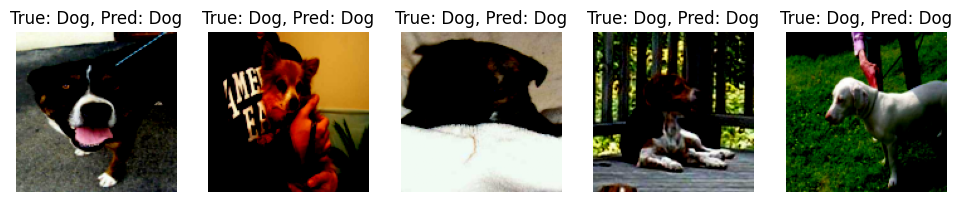

In [15]:
def show_predictions(images, labels, preds):
    fig, axes = plt.subplots(1, len(images), figsize=(12, 4))
    for i, (img, lbl, pred) in enumerate(zip(images, labels, preds)):
        ax = axes[i]
        ax.imshow(img.permute(1, 2, 0).cpu().numpy())
        ax.set_title(f"True: {'Dog' if lbl==1 else 'Cat'}, Pred: {'Dog' if pred==1 else 'Cat'}")
        ax.axis("off")

# Get a batch of validation images and show predictions
inputs, labels = next(iter(val_loader))
inputs, labels = inputs[:5].to(device), labels[:5]
outputs = model(inputs)
_, preds = torch.max(outputs, 1)
show_predictions(inputs.cpu(), labels, preds.cpu())
